In [1]:
from get_dataloader import get_dataloaders
from model import init_model

In [2]:
train,valid,test,class_to_idx=get_dataloaders()

Dataset downloaded to: /home/wicaksonolxn/.cache/kagglehub/datasets/jonathanoheix/face-expression-recognition-dataset/versions/1
Dataset loaded successfully!
Number of training samples: 28821
Number of validation samples: 3533
Number of test samples: 3533
Number of classes: 7


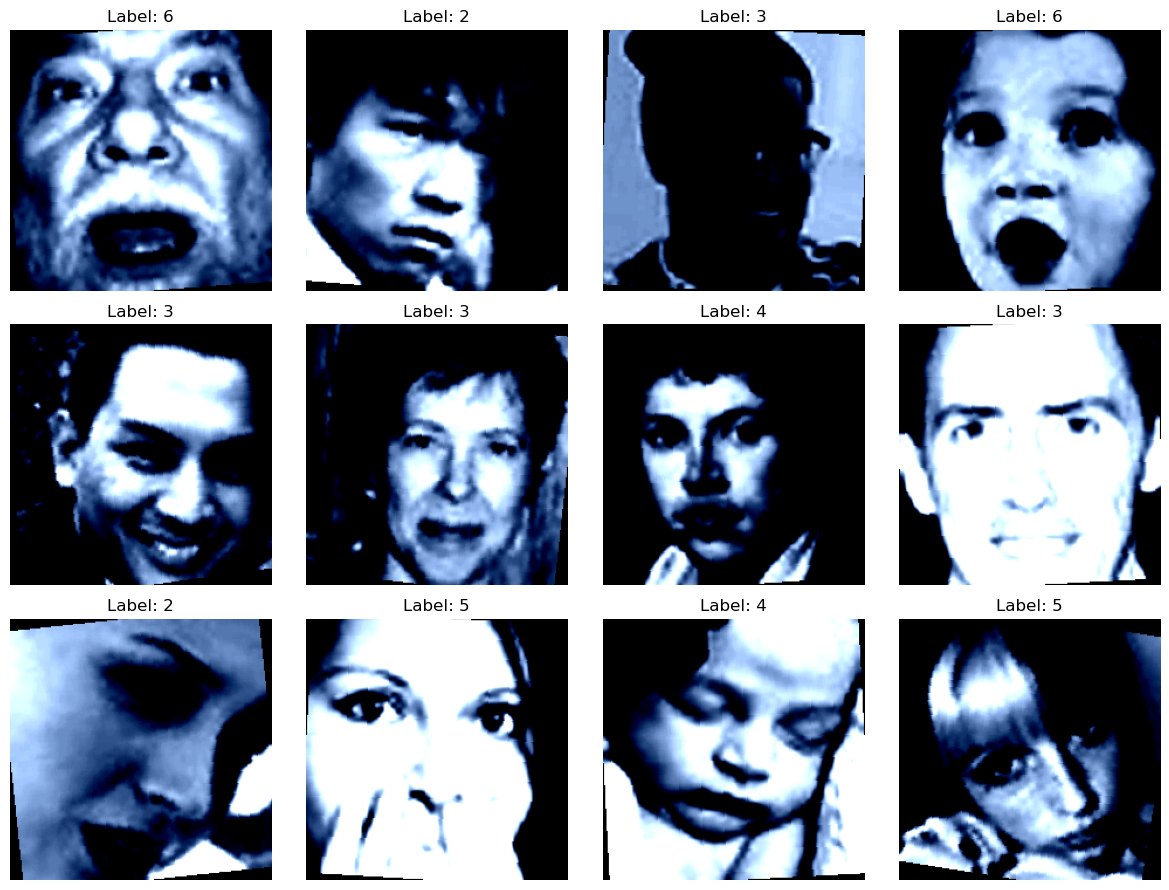

In [3]:
import matplotlib.pyplot as plt
images, labels = next(iter(train))
imgs = images[:12]
lbls = labels[:12]
fig, axes = plt.subplots(3, 4, figsize=(12, 9))
for img, lbl, ax in zip(imgs, lbls, axes.flatten()):
    img_np = img.permute(1, 2, 0).cpu().numpy()
    ax.imshow(img_np)
    ax.set_title(f"Label: {int(lbl)}")
    ax.axis('off')

plt.tight_layout()
plt.show()
